# 최근린 분석(가장 집적된 곳)

In [3]:
import os
import geopandas as gpd
import pandas as pd
import numpy as np
import geojson as gj
from tqdm import tqdm
import pickle
from shapely.geometry import Polygon
from shapely.geometry import Point
import shapely.speedups
import sys
shapely.speedups.enable()

import warnings
warnings.filterwarnings(action='ignore')

import json
import networkx as nx
from multiprocessing import Process
from pandas import ExcelWriter
import pydeck as pdk
from folium import FeatureGroup, LayerControl
import random
import plotly.express as px
import plotly
import plotly.graph_objects as go
# import libpysal as lps
# import esda
# import pysal as ps
# from numpy.random import seed
# from numpy.random import randn
# from scipy.stats import normaltest
# from scipy.stats import shapiro
# from scipy.stats import anderson

/opt/app-root/lib/python3.6/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [1]:
import mapclassify as mc
import matplotlib.pyplot as plt
#import pysal.viz.mapclassify as mc
from matplotlib.colors import rgb2hex
from matplotlib.colors import ListedColormap
import matplotlib

In [165]:
# 데이터
df=gpd.read_file("테스트.geojson",driver="GeoJSON")
df.reset_index()
df.fillna(0, inplace=True)
df

,gid,상업지역면적,공업지역면적,주거지역면적,녹지지역면적,여성안심택배함_격자별개수,편의점_격자별개수,공원_격자별개수,안전비상벨_격자별개수,노숙인자활시설_격자별개수,...,공동주거건축물비율,사고다발지역,경찰서_Buffer면적,치안센터_Buffer면적,보안등_Buffer면적,가로등_Buffer면적,CCTV_Buffer면적,유흥업소_Buffer면적,rep_cnt,geometry
0,다사49aa19ab,0.0,0.0,0.0,1.533091e-06,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,"MULTIPOLYGON (((126.92477 37.27077, 126.92475 ..."
1,다사49aa19ba,0.0,0.0,0.0,2.217984e-07,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,"MULTIPOLYGON (((126.92475 37.27302, 126.92473 ..."
2,다사49aa20aa,0.0,0.0,0.0,1.536883e-07,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,"MULTIPOLYGON (((126.92472 37.27753, 126.92470 ..."
3,다사49ab18ab,0.0,0.0,0.0,6.017091e-07,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,"MULTIPOLYGON (((126.92766 37.26177, 126.92764 ..."
4,다사49ab18ba,0.0,0.0,0.0,3.456896e-06,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,"MULTIPOLYGON (((126.92764 37.26402, 126.92762 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2085,다사63ba21aa,0.0,0.0,0.0,1.206657e-06,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,"MULTIPOLYGON (((127.08822 37.28722, 127.08821 ..."
2086,다사63ba21ab,0.0,0.0,0.0,9.069994e-08,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,"MULTIPOLYGON (((127.08821 37.28947, 127.08820 ..."
2087,다사63ba21ba,0.0,0.0,0.0,7.868796e-07,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,"MULTIPOLYGON (((127.08820 37.29173, 127.08819 ..."
2088,다사63ba21bb,0.0,0.0,0.0,2.346309e-06,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.374772e-08,0.0,0.0,0,"MULTIPOLYGON (((127.08819 37.29398, 127.08818 ..."


2.3. 핫스팟 분석

- local moran's I 통계방법을 사용하여 핫스팟 분석

- grid 별 rep_cnt hotpost 탐지 

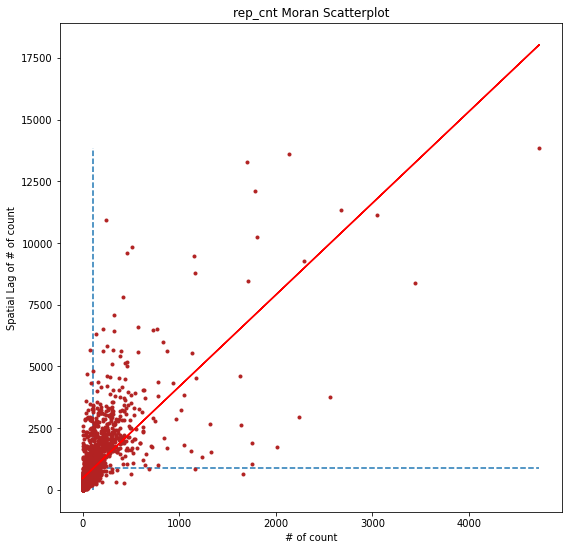

In [12]:
# grid 별 rep_cnt에 대한 moran scatter plot - df 값마다 시행(지도, 모란 시각화)
wq =  lps.weights.Queen.from_dataframe(df)
c = df['rep_cnt']
c_lag = lps.weights.lag_spatial(wq, c)
clagq5 = mc.Quantiles(c_lag, k=5)
b, a = np.polyfit(c, c_lag, 1)
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(c, c_lag, '.', color='firebrick')

 # dashed vert at mean of the price
plt.vlines(c.mean(), c_lag.min(), c_lag.max(), linestyle='--')
 # dashed horizontal at mean of lagged price
plt.hlines(c_lag.mean(), c.min(), c.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(c, a + b*c, 'r')
plt.title('rep_cnt Moran Scatterplot')
plt.ylabel('Spatial Lag of # of count')
plt.xlabel('# of count')
#plt.savefig(os.path.join(result_path, 'rep_cnt Moran.png'))
plt.show()


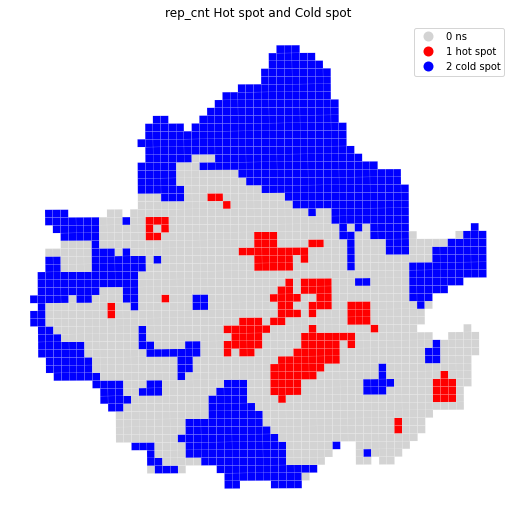

In [13]:
# 통계적 유의한 지역 추출
li = esda.Moran_Local(c, wq)
sig = 1 * (li.p_sim < 0.05)
# hotspot , coldspot 추출
hotspot = 1 * (sig * li.q==1) # H-H
coldspot = 2 * (sig * li.q==3) # L-L

spots = hotspot + coldspot 
spot_labels = [ '0 ns', '1 hot spot', '2 cold spot']
labels = [spot_labels[i] for i in spots]

df['rep_cnt hot_spot'] = spots

# hotspot을 빨강색, coldspot 파랑색으로 단계구분도 plot

from matplotlib import colors
hmap = colors.ListedColormap([ 'lightgrey', 'red', 'blue'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True,         k=2, cmap=hmap, linewidth=0.1, ax=ax,         edgecolor='white', legend=True)
ax.set_axis_off()
plt.title('rep_cnt Hot spot and Cold spot')
plt.savefig(os.path.join(result_path, 'rep_cnt Hot_spot_cold_spot.png'))
plt.show()


## 최근린 (Average Nearest Neighbor) 분석

- grid 별 최근접 이웃과의 거리의 평균 분석을 통해 경쟁을 정량화해서 확인
- 위경도가 있는(geometry가 point 형) 데이터들 전부 사용 가능

In [14]:
!pip install pointpats
from pointpats.distance_statistics import G, F, J, K, L, Genv, Fenv, Jenv, Kenv, Lenv
from pointpats import PointPattern, PoissonPointProcess, as_window

In [157]:
others_alcohol = gpd.read_file('8.4개시도_유흥업소현황.geojson')
others_alcohol

,STORE_ID,BUSINESS_NM,STORE_NM,COM_LC_CD,COM_LC_NM,COM_MC_CD,COM_MC_NM,COM_SC_CD,COM_SC_NM,KSIC_CD,...,BLDG_NM,ROAD_ADDR,OLD_ZIP_CODE,ZIP_CODE,DONG,FLOOR,HO,LON,LAT,geometry
0,20928658,채플린노래연습장,None,N,관광/여가/오락,N02,무도/유흥/가무,N02A01,노래방,R91223,...,None,경기도 수원시 권선구 삼천병마로1598번길 12,441849,16635,None,1,None,126.964289,37.245329,POINT (126.96429 37.24533)
1,25447952,워커힐노래방,None,N,관광/여가/오락,N02,무도/유흥/가무,N02A01,노래방,R91223,...,None,경기도 수원시 장안구 팔달로271번길 36,440818,16269,None,1,None,127.013671,37.290940,POINT (127.01367 37.29094)
2,25393963,왈츠노래방,None,N,관광/여가/오락,N02,무도/유흥/가무,N02A01,노래방,R91223,...,이천빌딩,경기도 수원시 팔달구 효원로291번길 28,442835,16488,None,2,None,127.034312,37.262510,POINT (127.03431 37.26251)
3,20799982,락휴,None,N,관광/여가/오락,N02,무도/유흥/가무,N02A01,노래방,R91223,...,None,경기도 수원시 영통구 아주로 18,443821,16502,None,4,4,127.044126,37.276376,POINT (127.04413 37.27638)
4,20846573,현대노래연습장,None,N,관광/여가/오락,N02,무도/유흥/가무,N02A01,노래방,R91223,...,None,경기도 수원시 권선구 구운로 29,441819,16410,None,-1,None,126.974839,37.276931,POINT (126.97484 37.27693)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4248,24311781,오케이노래연습장,None,N,관광/여가/오락,N02,무도/유흥/가무,N02A01,노래방,R91223,...,연무건재,경기도 수원시 장안구 연무로42번길 36,440811,16216,None,None,None,127.027992,37.296348,POINT (127.02799 37.29635)
4249,24345501,별빛노래방,None,N,관광/여가/오락,N02,무도/유흥/가무,N02A01,노래방,R91223,...,None,경기도 수원시 권선구 권선로640번길 12,441821,16564,None,-1,None,127.020837,37.260137,POINT (127.02084 37.26014)
4250,24578950,인연노래연습장,None,N,관광/여가/오락,N02,무도/유흥/가무,N02A01,노래방,R91223,...,세류역사,경기도 수원시 권선구 정조로 393-1,441430,16659,2,None,None,127.013970,37.244644,POINT (127.01397 37.24464)
4251,24922026,일번가노래방,None,N,관광/여가/오락,N02,무도/유흥/가무,N02A01,노래방,R91223,...,None,경기도 수원시 장안구 금당로 17,440200,16283,None,None,None,127.014043,37.304775,POINT (127.01404 37.30477)


In [168]:
# data_alcohol의 좌표계를 UTM-K로 변환
data_alcohol = others_alcohol.to_crs(epsg = 5179)
data_alcohol = data_alcohol.to_crs(epsg = 5179)


# 각 상점 별 최근접 이웃간의 거리 구하기(nearest neighborhodd distance: NND)
pp = PointPattern([(j.x,j.y) for j in data_alcohol['geometry']])
data_alcohol['nnd'] = pp.nnd
data_alcohol = data_alcohol.to_crs(epsg = 4326)

# 각 상점이 어느 grid에 속한지 확인
gid = []
for i in tqdm(range(len(data_alcohol))):
    if any(df['geometry'].contains(data_alcohol.iloc[i]['geometry'])):
        gid.append(df[df['geometry'].contains(data_alcohol.iloc[i]['geometry'])]['gid'].values[0])
    else:
        gid.append('Null')

data_alcohol['gid'] = gid

100%|██████████| 4253/4253 [00:14<00:00, 289.25it/s]


In [171]:
# 각 grid 별 평균 nnd 구하기
gid_list = set(data_alcohol['gid'])
mean_nnd = 0 
d= dict()
for i in gid_list:
    temp = data_alcohol[data_alcohol['gid']==i]
    mean_nnd = temp['nnd'].sum()/len(temp)
    d[i] = mean_nnd
    print(i,': 평균 nn 거리', mean_nnd)

다사53ab18bb : 평균 nn 거리 42.17388230372521
다사59bb18ba : 평균 nn 거리 44.140694267126186
다사60bb15bb : 평균 nn 거리 365.96647284503644
다사56aa21aa : 평균 nn 거리 68.38452519137597
다사59ab17ba : 평균 nn 거리 122.59555156114726
다사58ba20ba : 평균 nn 거리 101.85578716353189
다사59bb19ab : 평균 nn 거리 80.74709138187029
다사53ab19bb : 평균 nn 거리 18.35591056340624
다사56bb16bb : 평균 nn 거리 46.98748348791903
다사55bb23aa : 평균 nn 거리 151.99477973242955
다사57ab17ba : 평균 nn 거리 25.990151960888934
다사58ab20bb : 평균 nn 거리 59.06894585067512
다사55ba21bb : 평균 nn 거리 295.3058753169585
다사58ba20bb : 평균 nn 거리 197.12851079440742
다사57ba20aa : 평균 nn 거리 111.94421223098573
다사53aa19ba : 평균 nn 거리 57.275498562546886
다사52bb22aa : 평균 nn 거리 45.67486096674435
다사55aa23ab : 평균 nn 거리 212.26782192010091
다사57bb19bb : 평균 nn 거리 191.63556441137243
다사53ab19aa : 평균 nn 거리 15.84630931214514
다사55bb21ab : 평균 nn 거리 59.25599699048003
다사58ab17ba : 평균 nn 거리 82.43096314177834
다사56bb17bb : 평균 nn 거리 24.89389966806294
다사58bb18ab : 평균 nn 거리 49.498991242026655
다사53aa22bb : 평균 nn 거리 441.60

 * ANN 값이 작을 수록 경쟁이 치열하다는 뜻이다
 * ANN 값을 역수로 취해줌으로서 경쟁이 치열한 정도를 눈으로 비교할 수 있음

In [174]:
# grid 별 ANN 역수 취하기
for i in df['gid']:
    if i in d.keys():
        df.loc[df[df['gid']==i].index,['평균 nnd 역수']] = 1/(d[i]+1)
    else:
        df.loc[df[df['gid']==i].index,['평균 nnd 역수']]  = 0

Text(0.5, 1.0, 'Inverse of Average nearest neighbor distance (Head-Tail breaks)')

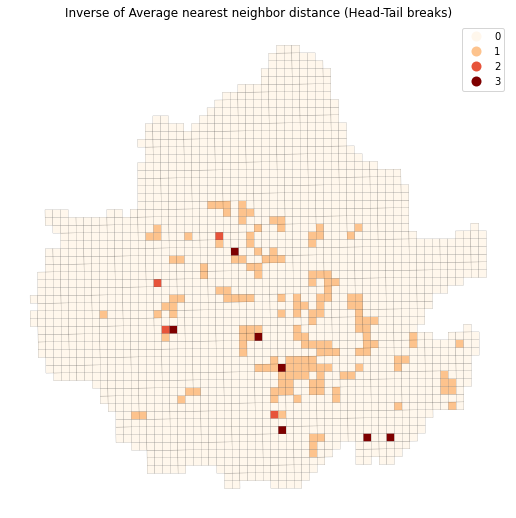

In [175]:
# ANN 역수를 HeadTailBreaks 방법으로 class를 나눈 후 단계구분도를 plot
hr10 = mc.HeadTailBreaks(df['평균 nnd 역수'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=hr10.yb,).plot(column='cl', categorical=True,         k=10, cmap='OrRd', linewidth=0.1, ax=ax,         edgecolor='black', legend=True)
ax.set_axis_off()
plt.title("Inverse of Average nearest neighbor distance (Head-Tail breaks)") # 색이 진할 수록 평균거리가 작음
# plt.savefig(os.path.join(result_path, "Average nearest neighbor distance, Head-Tail breaks.png"))

In [182]:
df['평균 nnd 역수'].value_counts()

0.000000    1865
1.000000       7
0.003674       2
0.004266       2
0.011986       2
            ... 
0.009034       1
0.004260       1
0.005148       1
0.034073       1
0.029314       1
Name: 평균 nnd 역수, Length: 200, dtype: int64

In [185]:
len(df)

2090

In [187]:
df_sorted=df.sort_values(by='평균 nnd 역수', ascending=False)
df_sorted

,index,gid,상업지역면적,공업지역면적,주거지역면적,녹지지역면적,여성안심택배함_격자별개수,편의점_격자별개수,공원_격자별개수,안전비상벨_격자별개수,...,사고다발지역,경찰서_Buffer면적,치안센터_Buffer면적,보안등_Buffer면적,가로등_Buffer면적,CCTV_Buffer면적,유흥업소_Buffer면적,rep_cnt,geometry,평균 nnd 역수
1703,1703,다사59bb15ba,0.0,0.0,0.000005,0.000001,0.0,0.0,1.0,0.0,...,0.0,0.000000,0.000000,0.000000e+00,7.688314e-07,1.445934e-05,0.000004,45,"MULTIPOLYGON (((127.04622 37.23749, 127.04620 ...",1.0
1161,1161,다사57aa15bb,0.0,0.0,0.000001,0.000005,0.0,1.0,0.0,0.0,...,0.0,0.000000,0.000004,1.848590e-07,1.230232e-06,4.197081e-06,0.000009,116,"MULTIPOLYGON (((127.01520 37.23962, 127.01519 ...",1.0
1818,1818,다사60ba15ba,0.0,0.0,0.000006,0.000000,0.0,2.0,1.0,0.0,...,0.0,0.000000,0.000006,6.942930e-08,8.031928e-07,2.053745e-05,0.000005,480,"MULTIPOLYGON (((127.05467 37.23752, 127.05466 ...",1.0
1169,1169,다사57aa17bb,0.0,0.0,0.000006,0.000000,0.0,2.0,0.0,3.0,...,0.0,0.000000,0.000000,1.625570e-06,2.119993e-07,1.315302e-05,0.000007,612,"MULTIPOLYGON (((127.01508 37.25765, 127.01507 ...",1.0
871,871,다사55ba21ba,0.0,0.0,0.000006,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.000006,0.000000,1.966124e-06,9.761969e-08,1.385093e-05,0.000007,427,"MULTIPOLYGON (((126.99794 37.29138, 126.99793 ...",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,699,다사54bb15ba,0.0,0.0,0.000000,0.000006,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0,"MULTIPOLYGON (((126.98985 37.23726, 126.98983 ...",0.0
698,698,다사54bb15ab,0.0,0.0,0.000000,0.000006,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0,"MULTIPOLYGON (((126.98986 37.23501, 126.98985 ...",0.0
697,697,다사54bb15aa,0.0,0.0,0.000000,0.000006,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,6.739166e-07,0.000000,0,"MULTIPOLYGON (((126.98988 37.23275, 126.98986 ...",0.0
696,696,다사54bb14bb,0.0,0.0,0.000000,0.000004,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1,"MULTIPOLYGON (((126.98989 37.23050, 126.98988 ...",0.0
